# 1. Import Data 

In [1]:
# import data 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# keep fig always in ipynb (if not restart disappear)
%matplotlib inline

In [3]:
# access datasets available in seaborn
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


In [4]:
# import data 
tips_df = sns.load_dataset("tips")

In [5]:
# apply the default theme
sns.set_theme()

# 2. Numerical Plots

## 2.1. Distribution Plots
* Univariate distribution of observations


### 2.1.1. Histogram

In [6]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


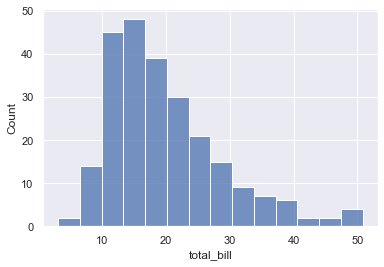

In [7]:
sns.histplot(data = tips_df["total_bill"]);

### 2.1.2. KDE 

* A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram.

* KDE represents the data using a continuous probability density curve in one or more dimensions


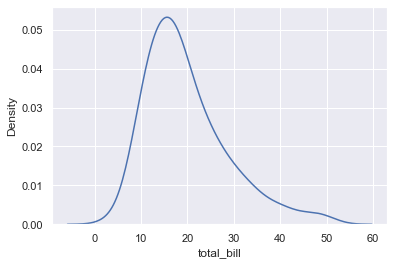

In [8]:
sns.kdeplot(data = tips_df["total_bill"]);

### 2.2.3. Displot = Histogram + KDE 

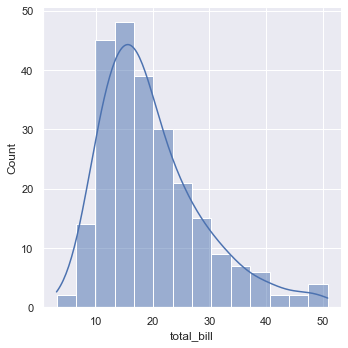

In [9]:
sns.displot(data = tips_df, x = "total_bill", kde = True);

## 2.2. Categorical Plots

### 2.2.1. Bar Plots

In [10]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


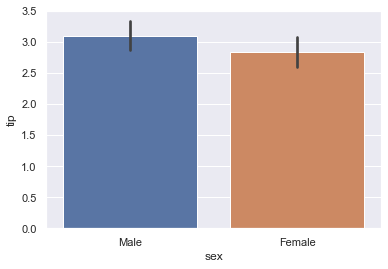

In [11]:
# male or female pay more tips ? 
sns.barplot(data = tips_df, x = "sex", y = "tip", estimator = np.mean);

### 2.2.2. Count Plot

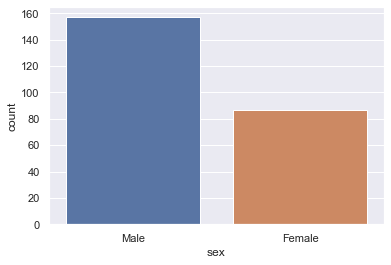

In [12]:
sns.countplot(data = tips_df, x ="sex");

## 2.3. Box Plot
Box Plot is a good indication of how the values in the data are spread out
* Identify outliers
* Check if data is symmetrical
* Determine how tightly data is grouped

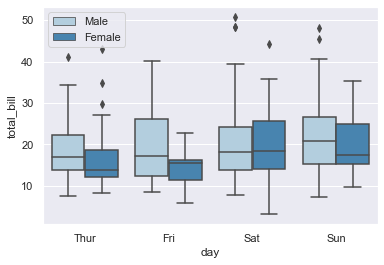

In [13]:
## add hue = "sex" if u want 
sns.boxplot(data = tips_df, x = "day", y = "total_bill", hue = "sex", palette = "Blues"); 

plt.legend(loc=0);

## 2.4. Facet Grid
* FacetGrid can be drawn with up to three dimensions: row, col, and hue.
* The main approach for visualizing data on this grid is with the FacetGrid.map() method.

In [14]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


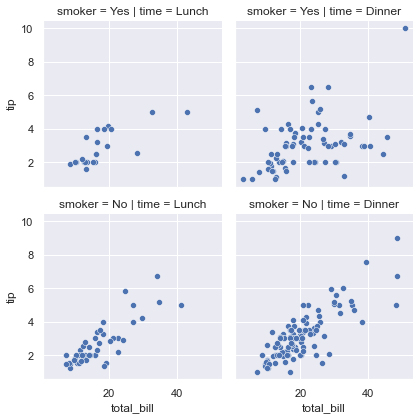

In [15]:
# Create a class instance of Facet Grid class
tips_fg = sns.FacetGrid(data = tips_df, row ="smoker", col ="time") 

tips_fg.map(sns.scatterplot, "total_bill", "tip");

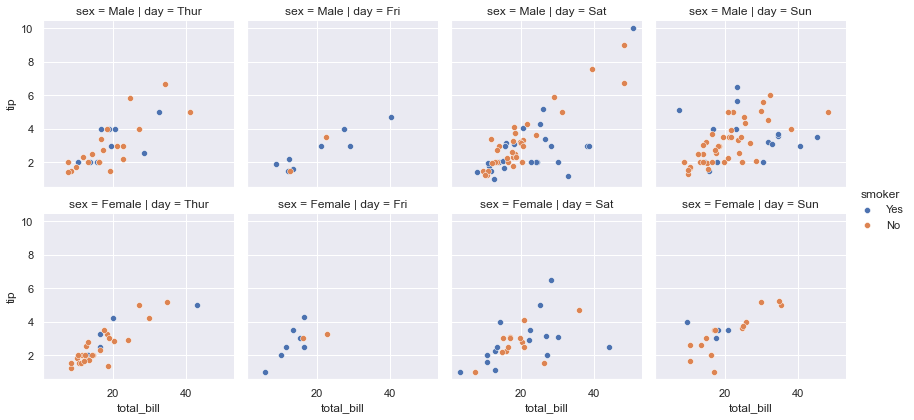

In [16]:
'''
Why use ***kws for formal ? 
> unzip tup/list/dict/...

Ex: a = {first: "Charles", sur: "Le"}
> **a = First: Charles & Sur: "Le"
'''
tip_fg1 = sns.FacetGrid(data = tips_df,
                        row = "sex",
                        col = "day",
                        hue = "smoker")
tip_fg1.map(sns.scatterplot, "total_bill", "tip");

tip_fg1.add_legend();

## 2.4.1. Join Plot

* `joint` distribution between two variables along with each variable’s marginal distribution

In [17]:
penguins_df = sns.load_dataset("penguins")

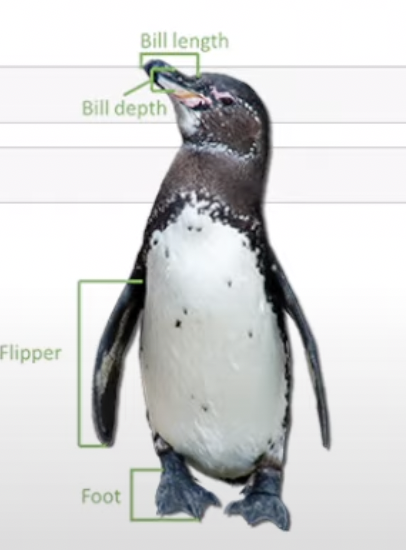

In [18]:
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


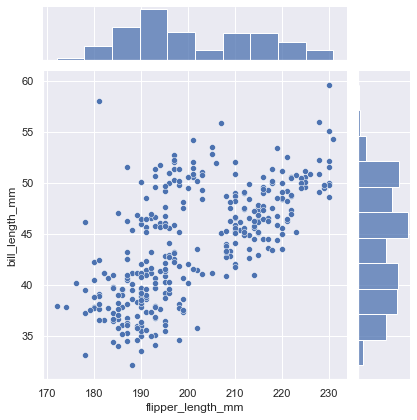

In [19]:
sns.jointplot(data = penguins_df, x ="flipper_length_mm", y = "bill_length_mm");

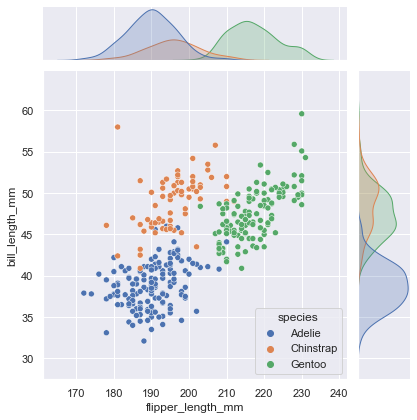

In [20]:
# if you want separate species, we will use hue 
sns.jointplot(data = penguins_df, x ="flipper_length_mm", y = "bill_length_mm", hue = "species");

## 2.4.2 Pair Plots

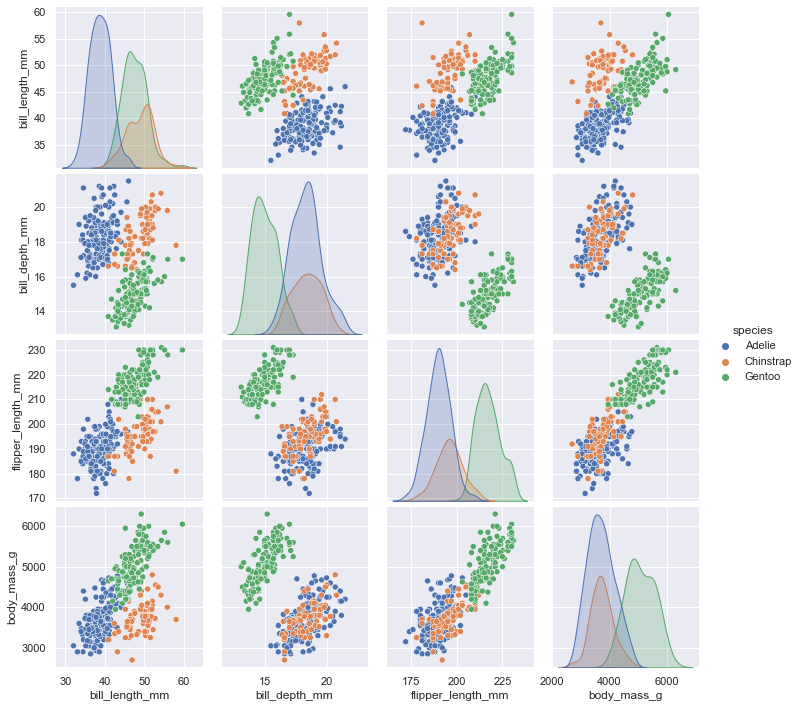

In [21]:
sns.pairplot(data=penguins_df, hue="species");

## 2.5. Heatmaps

* Describing density or intensity of variables, visualize patterns, variance, and even anomalies.


In [22]:
flights_df = sns.load_dataset("flights")
flights_df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [23]:
flights = pd.pivot_table(flights_df, index = "month", columns = "year", values = "passengers")
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


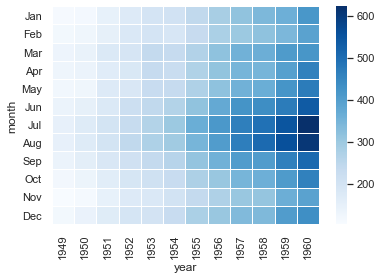

In [24]:
sns.heatmap(data = flights, cmap = "Blues", linecolor = "white", linewidth = 1);